In [1]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

In [2]:
g_reviews = reviews_all(
        "com.jetstartgames.chess",
        sleep_milliseconds=0, 
        lang='en', 
        country='us',
        sort=Sort.NEWEST, 
    )

In [3]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,620243b1-cb70-425c-a309-b7a6e33cf02c,A Google user,None,good chess game,5,0,2026-01-20 20:25:56,None,NaT,2.8.9,en,us
1,Google Play,8de8e345-f676-43a0-9806-cf8f2d0278ec,A Google user,None,This is a great app. Absolutely free and no ad...,5,0,2026-01-20 14:52:12,None,NaT,2.8.9,en,us
2,Google Play,5d19cffb-c93a-4934-ab07-87616d7056cd,A Google user,None,when someone pays close attention to the Chess...,4,0,2026-01-20 13:14:48,None,NaT,None,en,us
3,Google Play,d5d6531e-0d7b-4fba-be0e-e7f0e178ec88,A Google user,None,This is the greatest chess learning app that I...,5,0,2026-01-20 11:37:39,None,NaT,None,en,us
4,Google Play,9f71e0cf-a516-4571-9402-a987e8b41496,A Google user,None,good app,4,0,2026-01-20 11:00:05,None,NaT,2.8.7,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245675,Google Play,aa6dd5c1-ee38-4f67-8442-44ed3d6662c4,A Google user,None,Good one,5,4,2015-09-09 11:15:55,None,NaT,None,en,us
245676,Google Play,7aba6853-4c6e-4624-a2ba-f3f5cd0fc1f2,A Google user,None,waste of time,1,2,2015-09-03 04:54:00,None,NaT,3.2,en,us
245677,Google Play,6c5882e9-6f75-45ea-a1ee-d01358ebb0c4,A Google user,None,انلمت,5,6,2015-08-25 10:45:36,None,NaT,3.2,en,us
245678,Google Play,3c9de7fe-3d6c-498d-9d8b-43acd1d4d2dd,A Google user,None,i was in chess team n school n king can kill k...,2,2,2015-08-20 08:55:02,None,NaT,3.2,en,us


In [4]:
g_df2['review_description'].str.len().describe()

count    245650.000000
mean         28.575856
std          48.450572
min           1.000000
25%           7.000000
50%          13.000000
75%          30.000000
max        1492.000000
Name: review_description, dtype: float64

In [5]:
g_df2['review_description'].sample(20, random_state=42)

85865                                                  Okay
86082     Sarvesh naam h mera maghar me rahta hu mai sab...
128208                                                   OK
113040                                                 nice
54753     For me, it is a game of games and a game of life.
159481                                            good game
29601                                                    Op
23767                                          Mindset game
132142                                          Good or bed
84954                                               Sanskar
237015                                            Good game
51535                                            Noooooooob
239260                                Good game download it
44812                                           Awesome app
21819                                     For learning game
169610                                                 nice
226664                                  

In [6]:
g_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245680 entries, 0 to 245679
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   source                   245680 non-null  object        
 1   review_id                245680 non-null  object        
 2   user_name                245680 non-null  object        
 3   review_title             0 non-null       object        
 4   review_description       245650 non-null  object        
 5   rating                   245680 non-null  int64         
 6   thumbs_up                245680 non-null  int64         
 7   review_date              245680 non-null  datetime64[ns]
 8   developer_response       318 non-null     object        
 9   developer_response_date  318 non-null     datetime64[ns]
 10  appVersion               163139 non-null  object        
 11  laguage_code             245680 non-null  object        
 12  country_code    

In [7]:
g_df2['rating'].value_counts(normalize=True).sort_index()

0    0.000008
1    0.082725
2    0.020124
3    0.056785
4    0.137447
5    0.702910
Name: rating, dtype: float64

In [8]:
g_df2['text_len'] = g_df2['review_description'].str.len()

In [9]:
g_df2.groupby('rating')['text_len'].mean()

rating
0    15.000000
1    42.112533
2    45.431230
3    32.350348
4    31.068799
5    25.707697
Name: text_len, dtype: float64

In [10]:
from matplotlib import pyplot as plt

In [12]:
rating_counts = g_df2["rating"].value_counts().sort_index()

Text(0.5, 1.0, 'Distribution of Ratings')

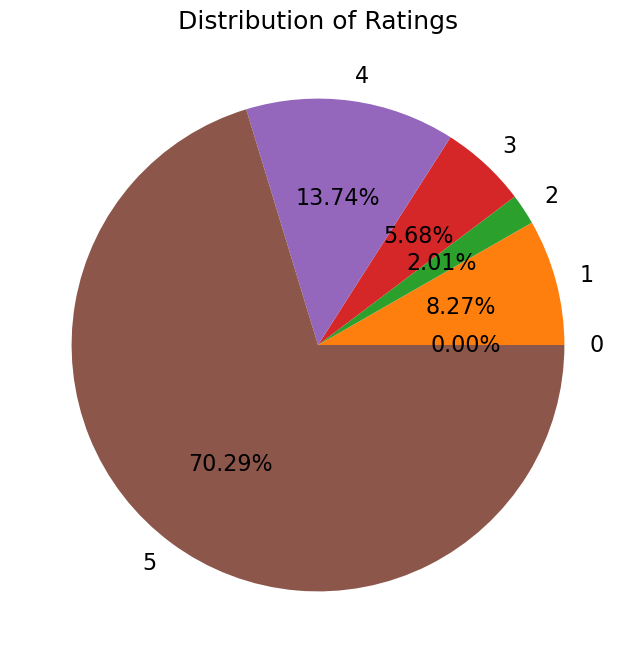

In [16]:
rating_counts.plot(
    kind="pie",
    autopct="%.2f%%",
    fontsize=16,
    figsize=(10, 8)
)

plt.title("Distribution of Ratings", fontsize=18)

In [ ]:
# This pie chart shows a strong class imbalance and a clear positivity bias in the dataset. 
# Most users tend to leave highly positive feedback, while negative or neutral reviews make up only a small fraction of the data.

In [19]:
g_df2["review_description"] = g_df2["review_description"].fillna("").astype(str)

In [20]:
g_df2["text_len"] = g_df2["review_description"].str.len()

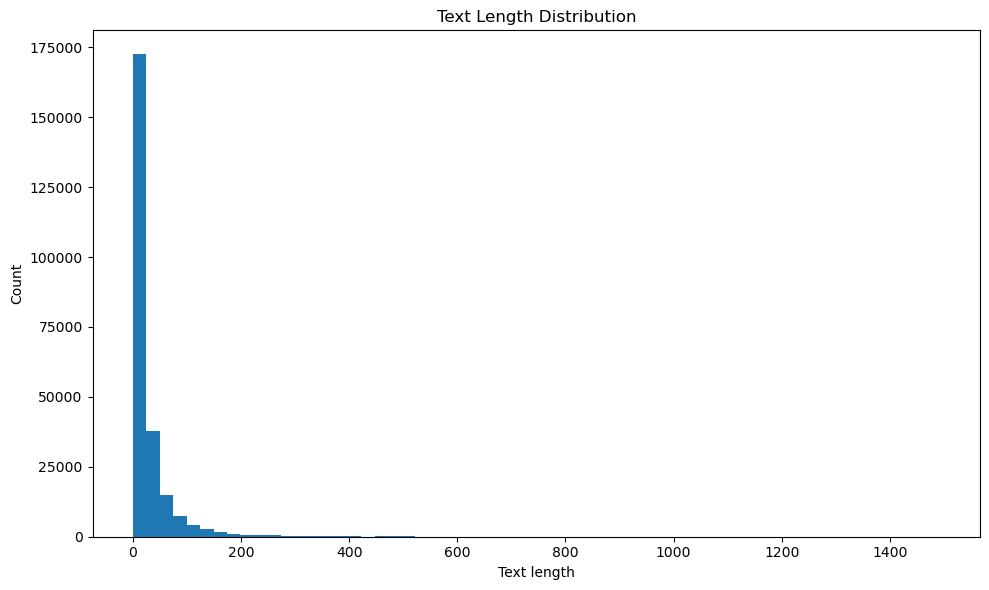

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(g_df2["text_len"], bins=60)
plt.title("Text Length Distribution")
plt.xlabel("Text length")
plt.ylabel("Count")
plt.tight_layout()

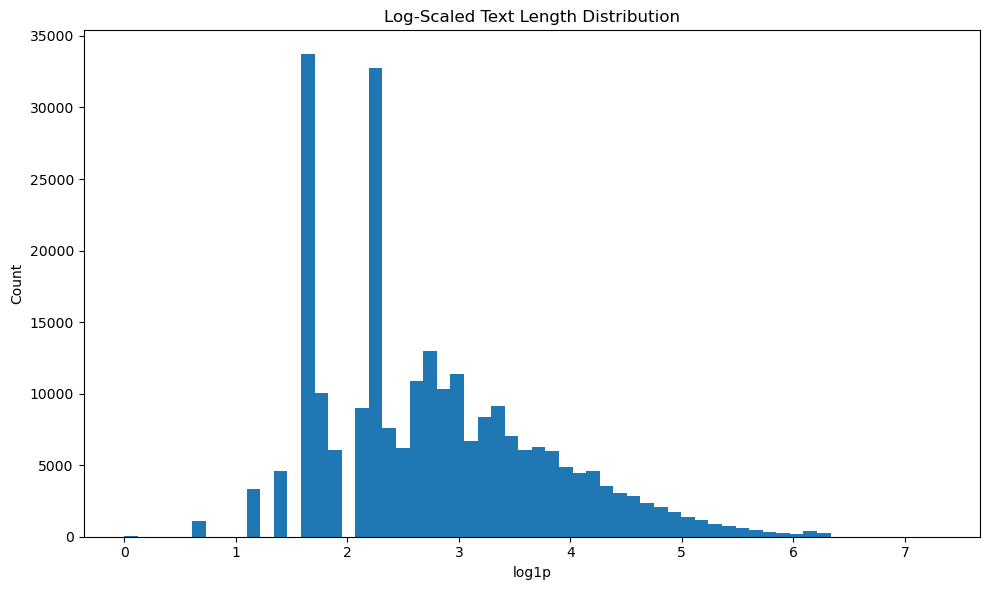

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(g_df2["text_len"]), bins=60)
plt.title("Log-Scaled Text Length Distribution")
plt.xlabel("log1p")
plt.ylabel("Count")
plt.tight_layout()

In [ ]:
# The persistence of right skew even after log scaling confirms that review length follows a heavy-tailed pattern, which is common in user-generated text data.

In [23]:
ratings_sorted = sorted(g_df2["rating"].unique())
data_by_rating = [g_df2.loc[g_df2["rating"] == r, "text_len"].values for r in ratings_sorted]

Text(0, 0.5, 'Text length')

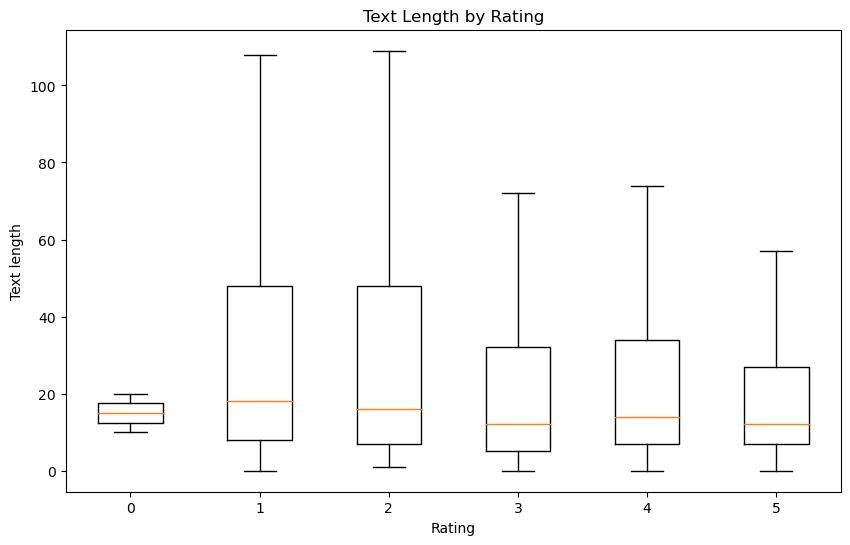

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_rating, labels=ratings_sorted, showfliers=False) 
plt.title("Text Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Text length")

In [ ]:
# Ratings such as 1 and 2 stars show noticeably larger spreads and higher upper ranges, dissatisfied users are more likely to write detailed, explanatory reviews. 
# Higher ratings tend to have shorter median lengths and tighter interquartile ranges, indicating that positive feedback is often brief.

In [25]:
mean_len = g_df2.groupby("rating")["text_len"].mean().reindex(ratings_sorted)

Text(0, 0.5, 'Avg text length')

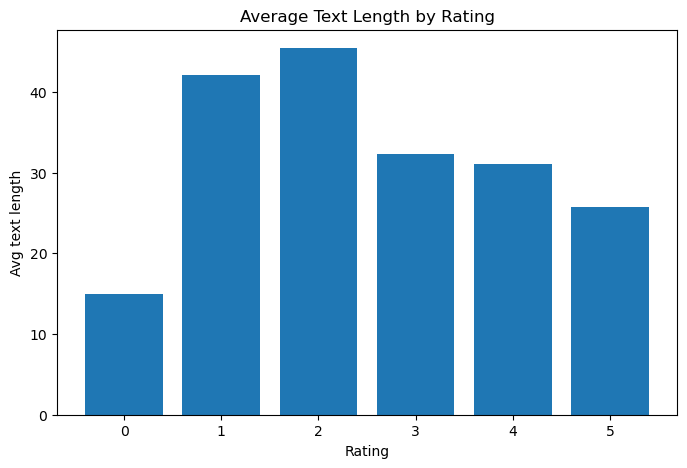

In [26]:
plt.figure(figsize=(8, 5))
plt.bar(mean_len.index.astype(str), mean_len.values)
plt.title("Average Text Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Avg text length")

In [27]:
missing_pct = g_df2.isna().mean().sort_values(ascending=False) * 100
missing_table = pd.DataFrame({
    "missing_pct": missing_pct.round(2),
    "missing_count": g_df2.isna().sum(),
    "dtype": g_df2.dtypes.astype(str)
}).sort_values("missing_pct", ascending=False)

In [28]:
display(missing_table.head(30))

,missing_pct,missing_count,dtype
review_title,100.00,245680,object
developer_response,99.87,245362,object
developer_response_date,99.87,245362,datetime64[ns]
appVersion,33.60,82541,object
country_code,0.00,0,object
laguage_code,0.00,0,object
rating,0.00,0,int64
review_date,0.00,0,datetime64[ns]
review_description,0.00,0,object
review_id,0.00,0,object


In [29]:
dup_pct = g_df2.duplicated().mean() * 100
print(f"Duplicate rows %: {dup_pct:.2f}%")

Duplicate rows %: 0.00%
